In [33]:
# Backtesting a simple moving average crossover strategy on Apple (AAPL) stock

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Download historical data
data = yf.download('AAPL', start='2015-01-01', end='2025-01-01', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [34]:
# 2. Calculate moving averages
short_window = 10
long_window = 50
data['MA10'] = data['Close'].rolling(window=short_window).mean()
data['MA50'] = data['Close'].rolling(window=long_window).mean()

In [35]:
# 3. Generate signals
data['Position'] = 0
mask = data['MA10'] > data['MA50']
data.loc[mask, 'Position'] = 1


# Generate signals (diff) for plotting buy/sell points
data['Signal'] = data['Position'].diff()



In [36]:
# 4. Backtest strategy
data['Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Return'] * data['Position'].shift(1)
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()
data['Cumulative_Market_Return'] = (1 + data['Return']).cumprod()

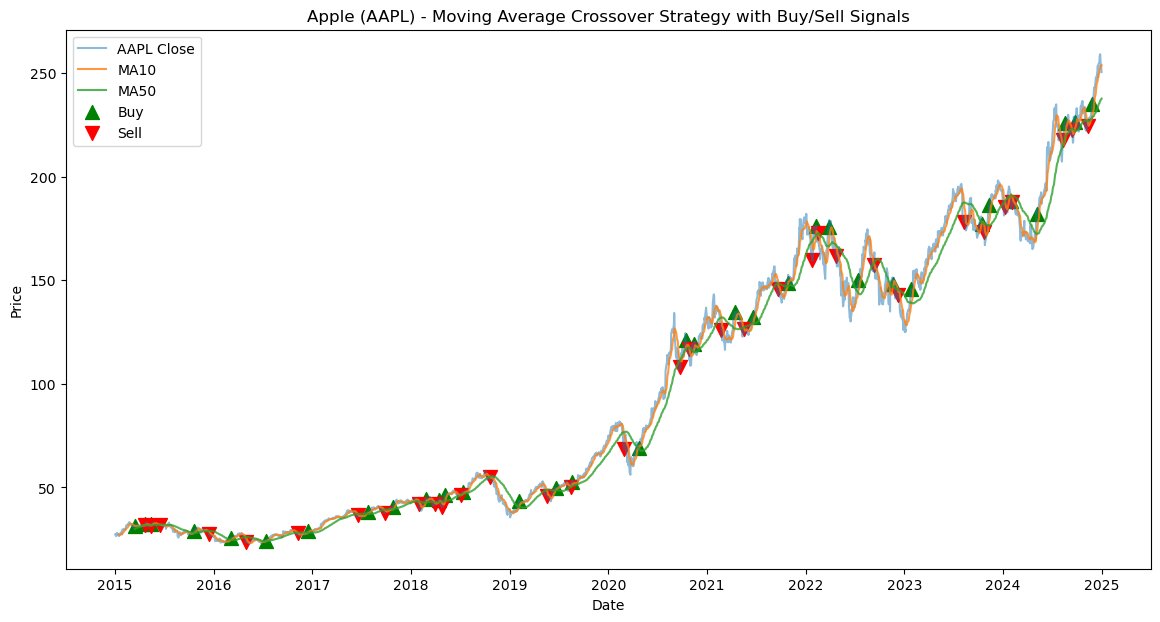

In [37]:
# 5. Plot results
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='AAPL Close', alpha=0.5)
plt.plot(data['MA10'], label='MA10', alpha=0.8)
plt.plot(data['MA50'], label='MA50', alpha=0.8)
plt.scatter(data.index[data['Signal'] == 1], data['Close'][data['Signal'] == 1], marker='^', color='green', label='Buy', s=100)
plt.scatter(data.index[data['Signal'] == -1], data['Close'][data['Signal'] == -1], marker='v', color='red', label='Sell', s=100)
plt.title('Apple (AAPL) - Moving Average Crossover Strategy with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

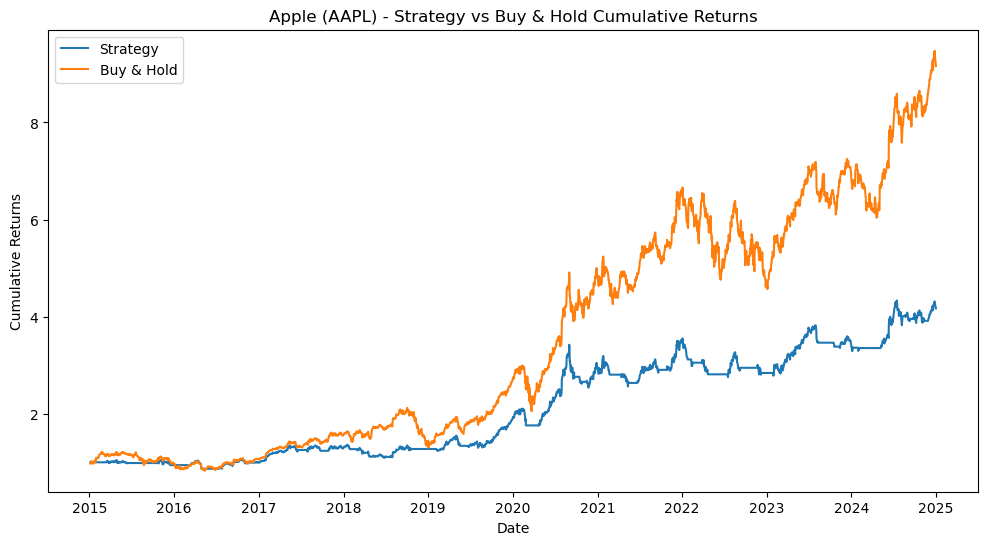

In [38]:
# 6. Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative_Strategy_Return'], label='Strategy')
plt.plot(data['Cumulative_Market_Return'], label='Buy & Hold')
plt.title('Apple (AAPL) - Strategy vs Buy & Hold Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()